MÉTODO BOX MULLER PARA GENERAR UNA DISTRIBUCIÓN NORMAL

Elaboró: **MARTINEZ PEREA EMILLI ASHLEY**

Código que genera una distribución normal a partir del método box muller. Los datos de la distribución son datos aleatorios generados por el mismo código. Al final graficamos en un histograma los datos simulados, con la media y desviacion estandar respecto a esos datos.

Teoría del método Box-Muller: \\
Box y Muller abordan el problema de generar variables aleatorias independientes con distribución normal estándar  $N(0,1)$ a partir de generadores de variables uniformes $U(0,1)$, proponiendo una solución algorítmica basada en transformaciones analíticas.

Parten de la observación de que el vector aleatorio bidimensional $(X,Y)$ con componentes independientes y distribuidos normalmente puede representarse en coordenadas polares como:
$$X=Rcos(Θ), Y=Rsen(\theta)$$
donde: \\
* $R\geq 0$ es una variable aleatoria con densidad proporcional a $re^{-\frac{-r^2}{2}}$ es decir, $R^2 \sim X_2^2$ equivalente a una exponencial de media 2  \\
* $\theta \sim Unif(0,2\pi)$ independiente de $R$.

Mediante un cambio de variables, los autores demuestran que si $U_1,U_2\sim Unif(0,1)$son independientes, entonces: \\
$$Z_0=\sqrt{-2ln(U_1)}cos(2\pi U_2), Z_1=\sqrt{-2ln(U_1)}sen(2\pi U_2)$$

definen dos variables aleatorias independientes con distribución normal estándar. La derivación se apoya en la transformación jacobiana del sistema uniforme $(U_1,U_2)$ al sistema normal bidimensional $(Z_0, Z_1)$ verificando que la densidad conjunta obtenida corresponde al producto de densidades normales independientes estándar.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean, stdev
from random import random
from math import log, pi, sqrt, cos, sin

Función que genera la distribución normal a partir del método Box Muller

**Seudocódigo:** \\
Generar $U_1, U_2 \sim U(0,1)$ \\
Hacer $R=\sqrt{-2ln(U)}$, $\theta= 2\pi U_2$ \\
Hacer $X=Rcos(\theta)$, $Y=Rsen(\theta)$ \\
Salir X,Y


In [2]:
def uniformes():
  u1, u2=random(),random()
  R=sqrt(-2*log(u1))
  theta=2*pi*u2
  x=R*cos(theta)
  y=R*sin(theta)
  return x,y

Simulación de datos sobre la función previa

In [3]:
valores=[]
for i in range(10000):
  valores.extend(uniformes())

Graficamos los datos

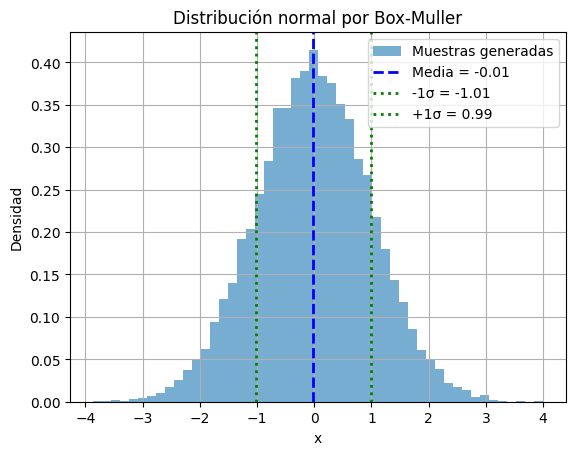

In [6]:
# Graficas
plt.hist(valores, bins=50, density=True, alpha=0.6, label='Muestras generadas')
#plt.plot(simulacion, distribucion, 'r-', lw=2, label='PDF Teórica')
plt.axvline(mean(valores), color='blue', linestyle='--', linewidth=2, label=f'Media = {mean(valores):.2f}')
plt.axvline(mean(valores) - stdev(valores), color='green', linestyle=':', linewidth=2, label=f'-1σ = {mean(valores) - stdev(valores):.2f}')
plt.axvline(mean(valores) + stdev(valores), color='green', linestyle=':', linewidth=2, label=f'+1σ = {mean(valores) + stdev(valores):.2f}')
plt.title('Distribución normal por Box-Muller')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Comparación de datos teóricos y datos simulados:

In [5]:
mediasimu = mean(valores)
stdevsimu = stdev(valores)

mediateo = 0
stdevteo = 1

print("Media teórica:", mediateo)
print("Media simulada:", mediasimu)

print("\nVarianza teórica:", stdevteo)
print("Varianza simulada:", stdevsimu)

Media teórica: 0
Media simulada: -0.012319882435356169

Varianza teórica: 1
Varianza simulada: 1.0018553837641488
